# Introduction to Probability

This notebook accompanies the Introduction to Probability lecture and includes the simulations and visualizations for different examples of the use of probability theory in practice. The aim of these examples is to build an intuition on how probability works.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Example 1: a coin toss

In [2]:
possible_outcomes = ['head', 'tail']

def toss_coin(possible_outcomes):
    outcome = random.sample(possible_outcomes, 1)[0]
    return outcome

toss_coin(possible_outcomes)

'tail'

In [3]:
def toss_coins(possible_outcomes, count):
    outcomes = []
    for i in range(count):
        outcome = toss_coin(possible_outcomes)
        outcomes.append(outcome)
    return outcomes

toss_coins(possible_outcomes, 10)

['tail',
 'tail',
 'tail',
 'head',
 'tail',
 'tail',
 'tail',
 'head',
 'head',
 'head']

In [4]:
# how often do we get head vs tail?

def count_outcomes(outcomes):
    values, counts = np.unique(outcomes, return_counts=True)
    return dict(zip(values, counts))

toss_counts = [10, 20, 50]

def count_outcomes_per_toss(toss_counts):
    result = {}
    for toss_count in toss_counts:
        outcomes = toss_coins(possible_outcomes, toss_count)
        result[f"{toss_count} tosses"] = count_outcomes(outcomes)
    return result

outcomes_per_toss = count_outcomes_per_toss(toss_counts)
outcomes_per_toss

{'10 tosses': {'head': 5, 'tail': 5},
 '20 tosses': {'head': 12, 'tail': 8},
 '50 tosses': {'head': 23, 'tail': 27}}

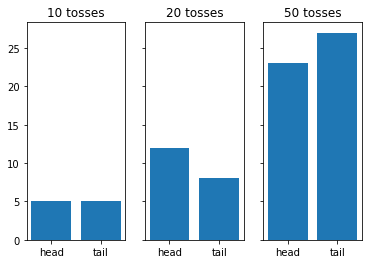

In [5]:
def plot_outcomes_per_toss(outcomes_per_toss):
    fig, axs = plt.subplots(1, len(outcomes_per_toss.keys()), clear=True, sharey=True)
    i = 0
    for name, toss_summary in outcomes_per_toss.items():
        x_values = toss_summary.keys()
        y_values = toss_summary.values()
        axs[i].bar(x_values, y_values)
        axs[i].title.set_text(name)
        i+=1

plot_outcomes_per_toss(outcomes_per_toss)

If we get heads and tails equally, we can think that a coin is fair. Are these coins fair? 

Write a function that instead of counts, plots the percentage of time heads and tails are obtained. Use the `plot_outcomes_per_toss` function as a starting point. 

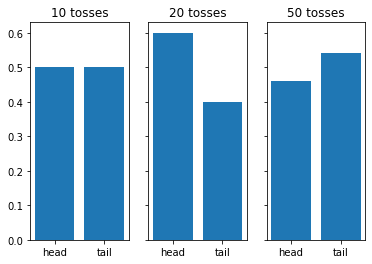

In [6]:
def plot_outcomes_per_toss_percentage(outcomes_per_toss):
    # remove below this: 
    fig, axs = plt.subplots(1, len(outcomes_per_toss.keys()), clear=True, sharey=True)
    i = 0
    for name, toss_summary in outcomes_per_toss.items():
        x_values = toss_summary.keys()
        y_values = np.array(list(toss_summary.values()))/sum(toss_summary.values())
        axs[i].bar(x_values, y_values)
        axs[i].title.set_text(name)
        i+=1

plot_outcomes_per_toss_percentage(outcomes_per_toss)

In [7]:
# potentially add animation here that just runs and adds more and more throws (so it ends up 0.5 aand 0.5)

In [8]:
# maybe here introduce the concept of probability distribution

# Example 2: Rolling a die

In [9]:
possible_outcomes = [1, 2, 3, 4, 5, 6]

def roll_die(possible_outcomes):
    outcome = random.sample(possible_outcomes, 1)[0]
    return outcome

roll_die(possible_outcomes)

2

In [10]:
def roll_die_many_times(possible_outcomes, count):
    outcomes = []
    for i in range(count):
        outcomes.append(random.sample(possible_outcomes, 1)[0])
    return outcomes

outcomes = roll_die_many_times(possible_outcomes, 50)
outcomes

[4,
 5,
 3,
 3,
 1,
 6,
 6,
 2,
 2,
 6,
 2,
 1,
 5,
 1,
 4,
 5,
 4,
 5,
 2,
 5,
 4,
 1,
 3,
 5,
 3,
 5,
 4,
 4,
 2,
 3,
 4,
 6,
 5,
 5,
 5,
 2,
 5,
 1,
 4,
 4,
 6,
 5,
 3,
 4,
 5,
 4,
 3,
 5,
 3,
 2]

In [11]:
count_outcomes(outcomes)

{1: 5, 2: 7, 3: 8, 4: 11, 5: 14, 6: 5}

In [12]:
def count_outcomes_per_roll(roll_counts, possible_outcomes, die_roll_func=roll_die_many_times):
    result = {}
    for roll_count in roll_counts:
        outcomes = die_roll_func(possible_outcomes, roll_count)
        result[f"{roll_count} rolls"] = count_outcomes(outcomes)
    return result

roll_counts = [10, 50, 100, 1000]
outcomes_per_roll = count_outcomes_per_roll(roll_counts, possible_outcomes)
outcomes_per_roll

{'10 rolls': {1: 3, 2: 3, 3: 1, 4: 2, 6: 1},
 '50 rolls': {1: 8, 2: 12, 3: 4, 4: 10, 5: 7, 6: 9},
 '100 rolls': {1: 21, 2: 16, 3: 15, 4: 15, 5: 16, 6: 17},
 '1000 rolls': {1: 159, 2: 194, 3: 187, 4: 149, 5: 155, 6: 156}}

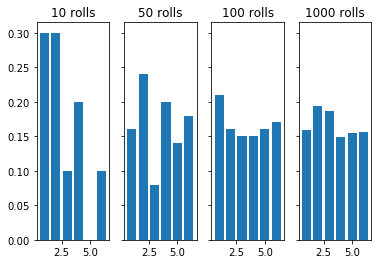

In [13]:
def plot_outcomes_per_roll(outcomes_per_roll):
    fig, axs = plt.subplots(1, len(outcomes_per_roll.keys()), clear=True, sharey=True)
    i = 0
    for name, roll_summary in outcomes_per_roll.items():
        x_values = roll_summary.keys()
        y_values = np.array(list(roll_summary.values()))/sum(roll_summary.values())
        axs[i].bar(x_values, y_values)
        axs[i].title.set_text(name)
        i+=1

plot_outcomes_per_roll(outcomes_per_roll)

In [14]:
# back to probability distributon and expected value and variation but for this data

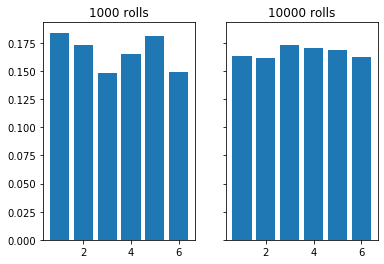

In [15]:
roll_counts = [1000, 10000]
outcomes_per_roll = count_outcomes_per_roll(roll_counts, possible_outcomes)

plot_outcomes_per_roll(outcomes_per_roll)

In [16]:
# what is the average value out of all the obtained outcomes?

sum(outcomes_per_roll["10000 rolls"])

21

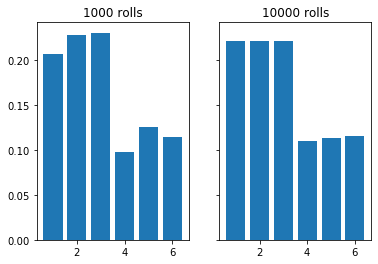

In [17]:
# what if we had an unfair die where 1, 2, and 3 where twice as likely to get as 4, 5, and 6?

possible_outcomes_with_proba = dict(zip([1, 2, 3, 4, 5, 6], [2/9, 2/9, 2/9, 1/9, 1/9, 1/9]))

def roll_unfair_die_many_times(possible_outcomes_with_proba: dict, count: int):
    outcomes = np.random.choice(list(possible_outcomes_with_proba.keys()), size=count, 
                                p=list(possible_outcomes_with_proba.values()))
    return outcomes

def count_outcomes_per_roll(roll_counts, possible_outcomes_proba, die_roll_func=roll_unfair_die_many_times):
    result = {}
    for roll_count in roll_counts:
        outcomes = die_roll_func(possible_outcomes_with_proba, roll_count)
        result[f"{roll_count} rolls"] = count_outcomes(outcomes)
    return result

def plot_outcomes_per_roll(outcomes_per_roll):
    fig, axs = plt.subplots(1, len(outcomes_per_roll.keys()), clear=True, sharey=True)
    i = 0
    for name, roll_summary in outcomes_per_roll.items():
        x_values = roll_summary.keys()
        y_values = np.array(list(roll_summary.values()))/sum(roll_summary.values())
        axs[i].bar(x_values, y_values)
        axs[i].title.set_text(name)
        i+=1

outcomes_per_roll = count_outcomes_per_roll(roll_counts, possible_outcomes_with_proba, roll_unfair_die_many_times)
plot_outcomes_per_roll(outcomes_per_roll)

In [18]:
# what is the average value out of all these throws?

outcomes_per_roll = outcomes_per_roll['10000 rolls']

print(outcomes_per_roll)

# the average weighted by how many times the number was selected:
sum([key * value for key, value in outcomes_per_roll.items()]) / sum(list(outcomes_per_roll.values()))

{1: 2205, 2: 2206, 3: 2204, 4: 1101, 5: 1135, 6: 1149}


3.0202

In [19]:
# same computation but based on the probabilities of getting each number, as we defined above:
sum([key * value for key, value in possible_outcomes_with_proba.items()])

2.9999999999999996